In [1]:
from brain import create_brain , write_brains_params
from keras import  layers, models,regularizers , optimizers
from trainer import train
import json
import pandas as pd
from formater import formate_datas
from filter import filter_datas
from tester import test_model ,  test_model_with_others_datas

2025-05-27 22:12:32.281164: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-27 22:12:32.281498: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-27 22:12:32.283447: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-27 22:12:32.289283: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748376752.299297  128378 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748376752.30

In [2]:
with open('params.json', "r", encoding="utf-8") as f:
    data = json.load(f)
params = data['params']
result =   data['result']

path_train  = data['path_formater_to_train']['data_to_train']
path_filtered_data_train = data['path_formater_to_train']['data_formated']

data_input = data['path_data_train']['data_input']
data_output = data['path_data_train']['data_output']
data_brain = data['path_brain']
path_params_brains = data['path_param_brains']
name_brain = data['name_brain']
epochs_brain = data['epoch_brain']

formated_data = data['path_formater_to_train']['data_formated']
path_entry = data['path_data_train']['data_input']
path_out = data['path_data_train']['data_output']

In [3]:
path_inputs_data = f'{data_input}' #pour entrainement
print(path_inputs_data)
path_outputs_data = f'{data_output}' #pour entrainement
path_brain = f"{data_brain}"
input_shape = data['input_shape']
output_shape = data['output_shape']


training/data/inputs_train/inputs.csv


In [4]:
brain = create_brain()

/home/deva/octopus_brain/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
W0000 00:00:1748376756.176660  128378 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,241 (8.75 KB)

 Trainable params: 2,241 (8.75 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
formate_datas(path_train , path_filtered_data_train)

0      1.712956e+09
1      1.712956e+09
2      1.712956e+09
3      1.712957e+09
4      1.712957e+09
           ...     
846    1.759300e+09
847    1.759301e+09
848    1.759301e+09
849    1.759301e+09
850    1.759301e+09
Name: Datetime, Length: 851, dtype: float64
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<  data formate success !!! >>>>>>>>>>>>>>>>>>>>>>>>>>>


In [6]:
filter_datas(formated_data , path_entry ,path_out)

training/data/formated_data/formated_data.csv
training/data/inputs_train/inputs.csv
        0
0   -10.0
1   -10.0
2    -9.4
3    -8.9
4    -8.4
..    ...
846  20.0
847  20.0
848  20.0
849  20.0
850  20.0

[851 rows x 1 columns]
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<  data filter to train success !!! >>>>>>>>>>>>>>>>>>>>>>>>>>>


In [7]:
duree_entrainement , shape ,history= train(brain , path_inputs_data, path_outputs_data , path_brain , epochs_brain)

Testing Input shape	: (850, 1)
Training Output shape	: (850, 1)
Epoch 1/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 888us/step - loss: 128.4144 - mae: 6.9453 
Epoch 2/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 752us/step - loss: 0.2029 - mae: 0.2147
Epoch 3/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step - loss: 0.1858 - mae: 0.2071
Epoch 4/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step - loss: 0.1795 - mae: 0.2139
Epoch 5/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step - loss: 0.1827 - mae: 0.2171
Epoch 6/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 738us/step - loss: 0.1730 - mae: 0.1991
Epoch 7/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 695us/step - loss: 0.1784 - mae: 0.2178
Epoch 8/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 674us/step - loss: 0.1772 - mae: 0.2141
Epoch 9/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 832us/step - loss: 0.1791 - mae: 0.2176
Epoch 10/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 650us/step - loss: 0.1924 - mae: 0.2352
Epoch 11/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step - loss: 0.1842 - mae: 0.2195
Epoch 1

départ : 2025-05-27 22:12:41.409734
fin : 2025-05-27 22:13:02.699723
la durée : 0:00:21.289989


In [47]:
write_brains_params(duree_entrainement , shape)

In [18]:
loss_values = history.history['loss']


print(loss_values)

[43.366676330566406, 0.19611753523349762, 0.1851399540901184, 0.18096986413002014, 0.18003149330615997, 0.17614945769309998, 0.17796990275382996, 0.17952817678451538, 0.1768447458744049, 0.1911471039056778, 0.1799207627773285, 0.18450018763542175, 0.18269678950309753, 0.17685766518115997, 0.18089230358600616, 0.18382331728935242, 0.1841769814491272, 0.18523994088172913, 0.18058304488658905, 0.1924138218164444, 0.19421672821044922, 0.18928101658821106, 0.19502967596054077, 0.1843060702085495, 0.19987323880195618, 0.1947760432958603, 0.18483446538448334, 0.18615078926086426, 0.1853542923927307, 0.19695597887039185, 0.19623011350631714, 0.1910531222820282, 0.2140062004327774, 0.19356264173984528, 0.20960496366024017, 0.21393175423145294, 0.2073885202407837, 0.21193209290504456, 0.1894567906856537, 0.20009011030197144, 0.19631579518318176, 0.21452875435352325, 0.2017296850681305, 0.2120499610900879, 0.21110084652900696, 0.2485123723745346, 0.1969800889492035, 0.19779786467552185, 0.2408535

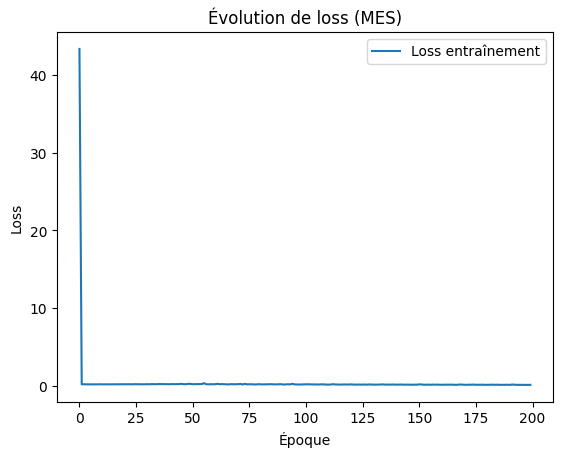

In [19]:


import matplotlib.pyplot as plt

plt.plot(loss_values, label='Loss entraînement')
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Loss validation')

plt.xlabel('Époque')
plt.ylabel('Loss')
plt.legend()
plt.title('Évolution de loss (MES)')
plt.show()


0     1.759298e+09
1     1.759298e+09
2     1.759298e+09
3     1.759298e+09
4     1.759299e+09
5     1.759299e+09
6     1.759299e+09
7     1.759300e+09
8     1.759300e+09
9     1.759300e+09
10    1.759301e+09
11    1.759301e+09
12    1.759301e+09
13    1.759301e+09
14    1.759302e+09
Name: Datetime, dtype: float64
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<  data formate success !!! >>>>>>>>>>>>>>>>>>>>>>>>>>>
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


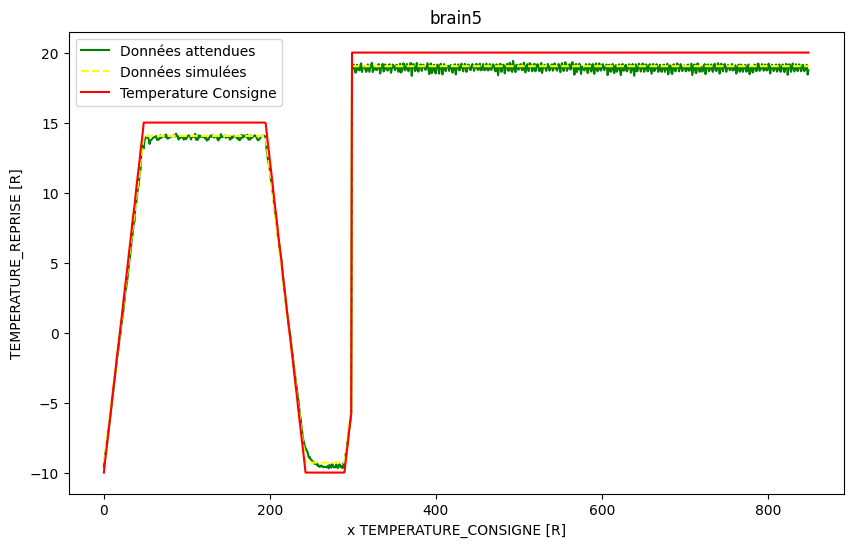

In [48]:



test_model()

data/brain/brain5.hdf5
0     1.759298e+09
1     1.759298e+09
2     1.759298e+09
3     1.759298e+09
4     1.759299e+09
5     1.759299e+09
6     1.759299e+09
7     1.759300e+09
8     1.759300e+09
9     1.759300e+09
10    1.759301e+09
11    1.759301e+09
12    1.759301e+09
13    1.759301e+09
Name: Datetime, dtype: float64
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<  data formate success !!! >>>>>>>>>>>>>>>>>>>>>>>>>>>
training/data/formated_data_test/formated_data.csv
training/data/inputs_test/inputs.csv
       0
0   20.0
1   20.0
2   20.0
3   20.0
4   20.0
5   20.0
6   20.0
7   20.0
8   20.0
9   20.0
10  20.0
11  20.0
12  20.0
13  20.0
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<  data filter to train success !!! >>>>>>>>>>>>>>>>>>>>>>>>>>>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


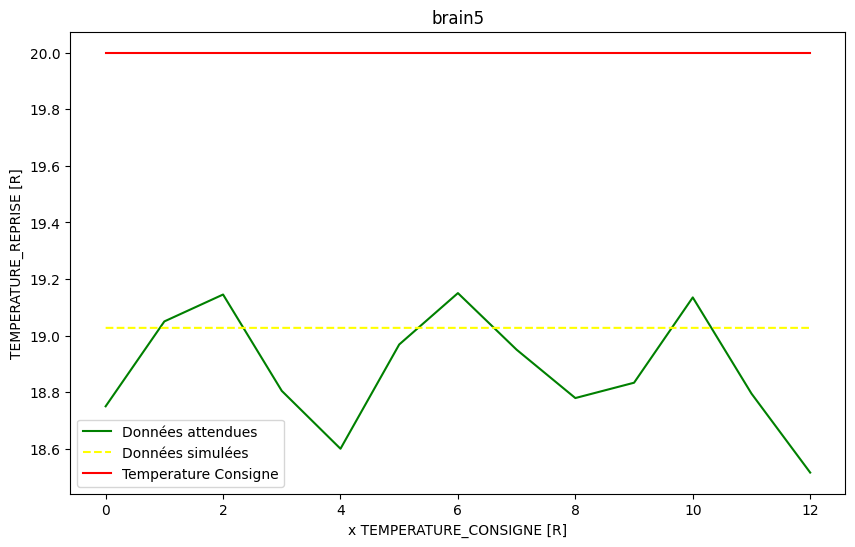

In [49]:
data_to_formate = data['path_formater_to_test']['data_to_test']
data_formated = data['path_formater_to_test']['data_formated']

data_input_to_test = data['path_formater_to_test']['data_input']
data_output_to_test = data['path_formater_to_test']['data_output']

data_simulated = data['path_formater_to_test']['data_simuled']
test_path_brain = data['path_brain']
print(test_path_brain)
test_model_with_others_datas(test_path_brain,data_to_formate , data_formated , data_input_to_test,data_output_to_test)